Here we analyse the manual assignment of venues to subjects.

In [15]:
import json
from matplotlib import pyplot as plt

In [3]:
candidates = {
  'venues': json.load(open('../data/json/dim/all/venue_candidates.json')),
  'advisors': json.load(open('../data/json/dim/all/advisor_candidates.json')),
  'referees': json.load(open('../data/json/dim/all/venue_candidates.json'))
}
assigned = json.load(open('../data/openalex/field_venue_cnt.json'))

Gather the documents of the venues without duplicate venues or documents

In [18]:
assigned_venues = []
for field in assigned:
  assigned_venues += list(assigned[field].keys())
len(assigned_venues)  # number of venues in the mapping

137

In [20]:
len(assigned_venues), len(set(assigned_venues))  # are there duplicates?

(137, 132)

In [23]:
venues = json.load(open('../data/json/dim/all/ert/venue_publications.json'))
advisors = json.load(open('../data/json/dim/all/ert/advisors.json'))
referees = json.load(open('../data/json/dim/all/ert/referees.json'))
all_venues = {}
for collection in (venues, advisors, referees):
  for venue in collection:
    if venue in assigned_venues:
      if venue in all_venues:
        all_venues[venue] = all_venues[venue].union(set(collection[venue]))
      else:
        all_venues[venue] = set(collection[venue])
len(all_venues)  # number of distinct venues in the mapping

132

How many venues are there with at least 10 documents?

In [4]:
cnt = 0
for venue in candidates:
  print(venue, len(candidates[venue]))
  cnt += len(candidates[venue])
print('total', cnt)

venues 70
advisors 13
referees 70
total 153


Analysis of venues included in the dataset.

In [9]:
venue_cnt = {k: len(v) for k, v in assigned.items()}
sum(venue_cnt.values())  # no. of venues in the dataset

137

In [10]:
sum(venue_cnt.values()) / len(venue_cnt.values())  # avg. no. of venues per field

7.2105263157894735

In [14]:
doc_cnt = {}  # no. of docs per field
for field in assigned:
  doc_cnt[field] = sum(assigned[field].values())
sum(doc_cnt.values())  # no. of docs in the dataset


3998

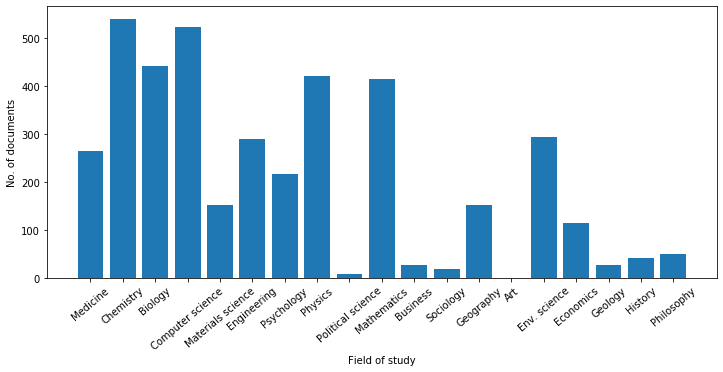

In [16]:
x = list(doc_cnt.keys())
x[x.index('Environmental science')] = 'Env. science'
plt.figure(figsize=(12,5))
plt.bar(range(len(doc_cnt)), doc_cnt.values())
plt.xticks(range(len(doc_cnt)), x, rotation=40)
plt.xlabel('Field of study')
plt.ylabel('No. of documents')
plt.show()